# Data preprocessing

In [17]:
import pandas as pd




df = pd.read_csv('/content/indian_liver_patient.csv')

df.isnull().sum()



,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [18]:

df.drop_duplicates(inplace=True)

df.rename(columns={'Dataset': 'Has_Liver_Disease'}, inplace=True)

df['Has_Liver_Disease'] = df['Has_Liver_Disease'].apply(lambda x: 1 if x == 1 else 0)

print(df.head())
print(df.tail())


   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Has_Liver_Disease  
0      3.3                        0.90

In [19]:

print("--- Data Report Card (Descriptive Statistics) ---")

report_card = df.describe()

print(report_card)

--- Data Report Card (Descriptive Statistics) ---
              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  570.000000       570.000000        570.000000            570.000000   
mean    44.849123         3.321754          1.497544            291.750877   
std     16.242182         6.267941          2.833231            245.291859   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            176.000000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                570.000000                  570.000000      570.000000   
mean                  79.728070                  109.380702        6.496316   
std       

--- Looking for Outliers with Box Plots ---


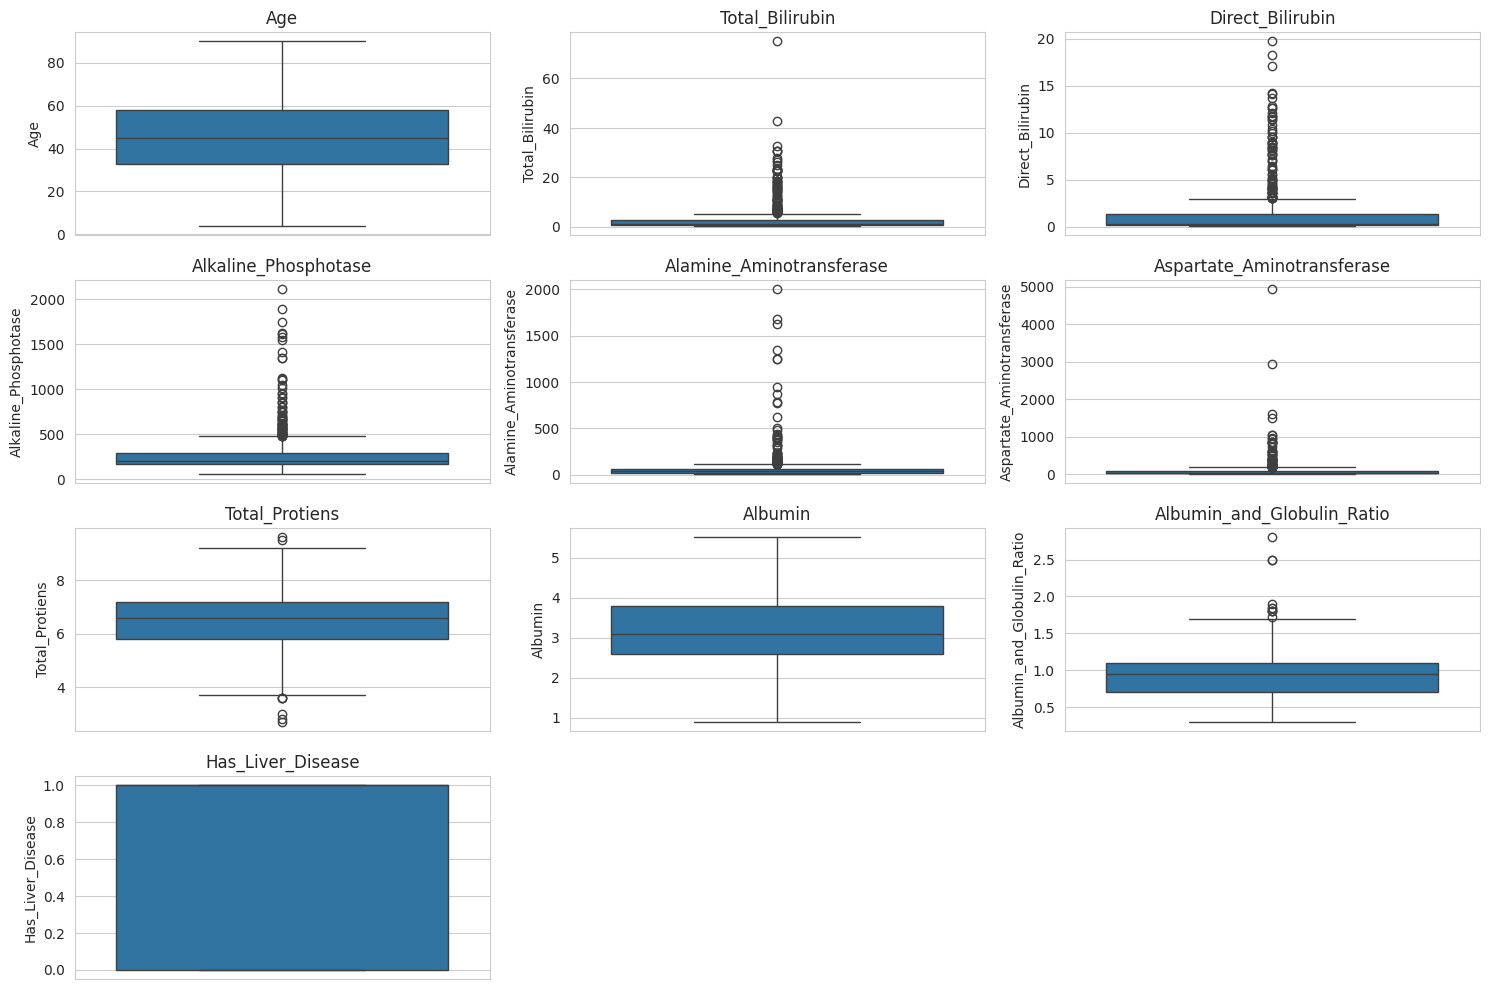

In [20]:
print("--- Looking for Outliers with Box Plots ---")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.savefig('outlier_boxplots.png')

plt.show()

The graphs reveal that patients with liver disease have significantly higher levels of bilirubin and specific liver enzymes, while their protein levels are often lower. These particular tests are strong clues for identifying the illness. The data also shows that while most patients have normal test results, a few have extremely high values, and the dataset includes more men than women

# EDA

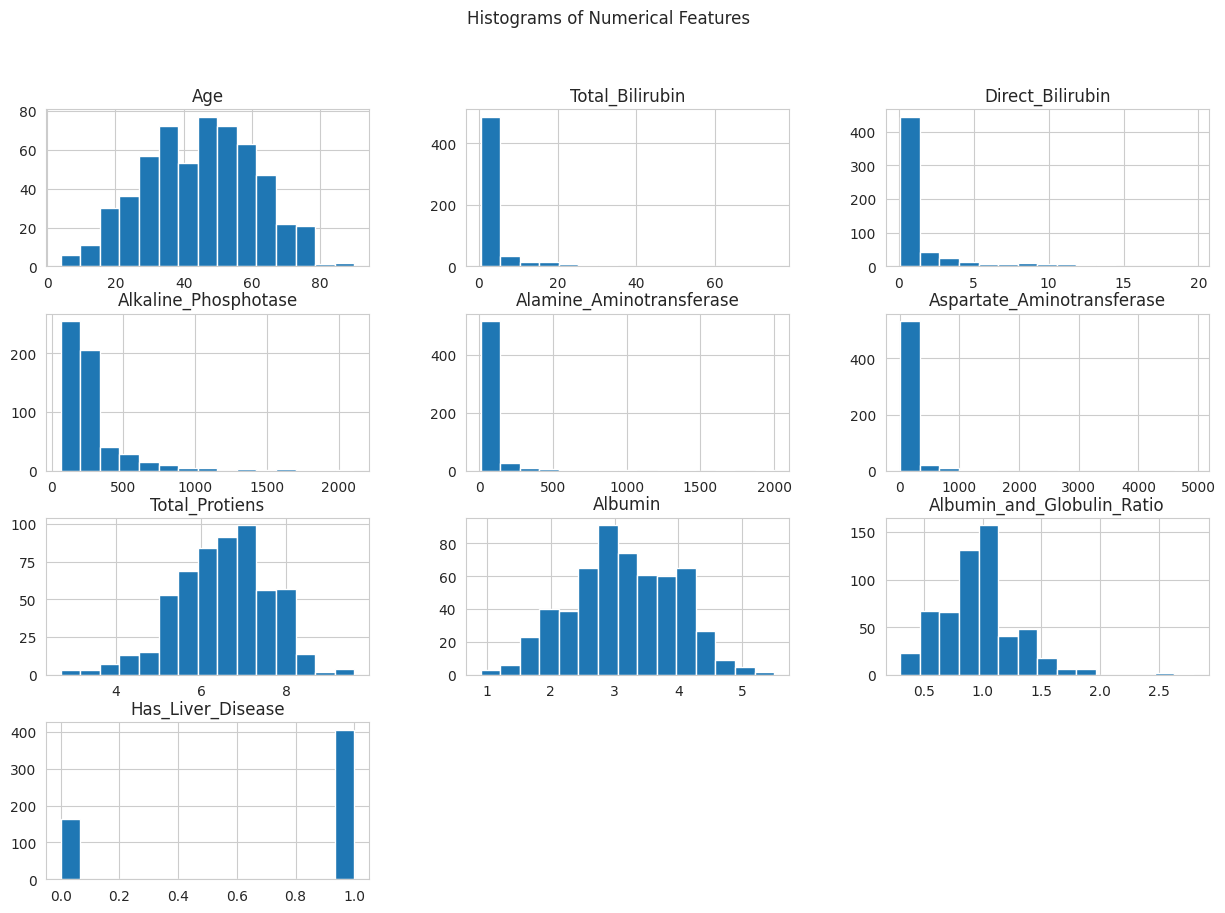

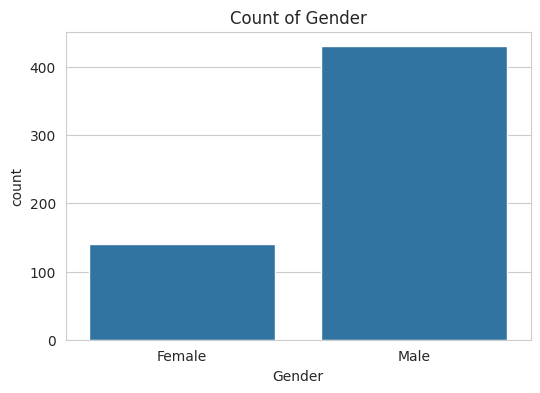

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")


numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle('Histograms of Numerical Features')
plt.savefig('numerical_histograms.png')



plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Count of Gender')
plt.savefig('gender_countplot.png')


plt.show()

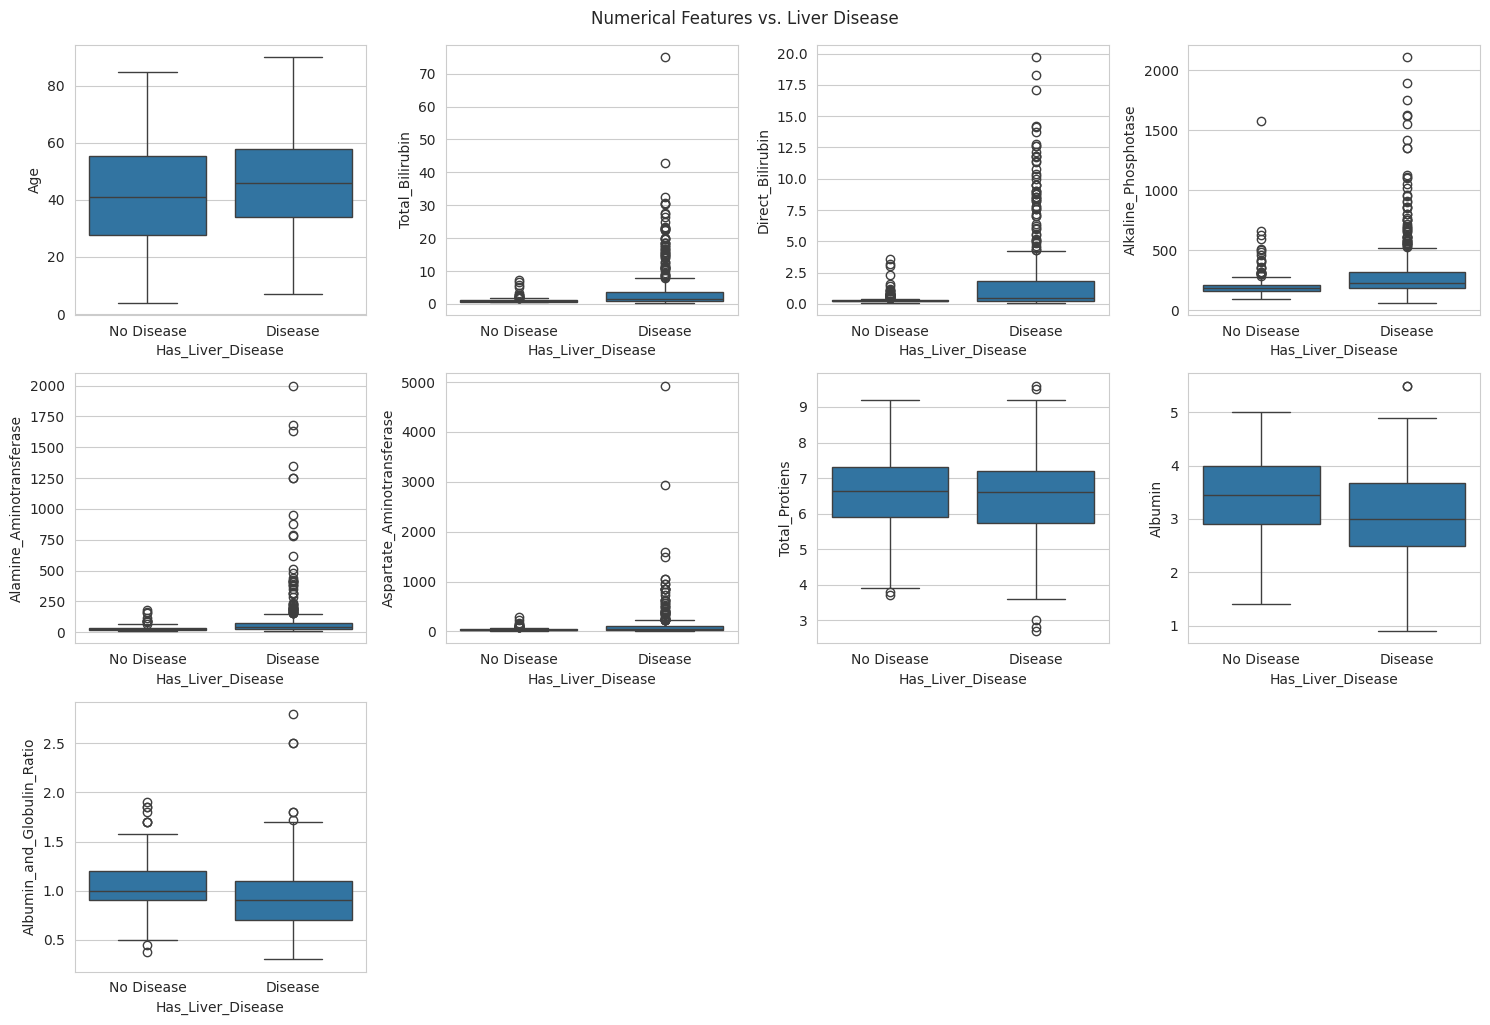

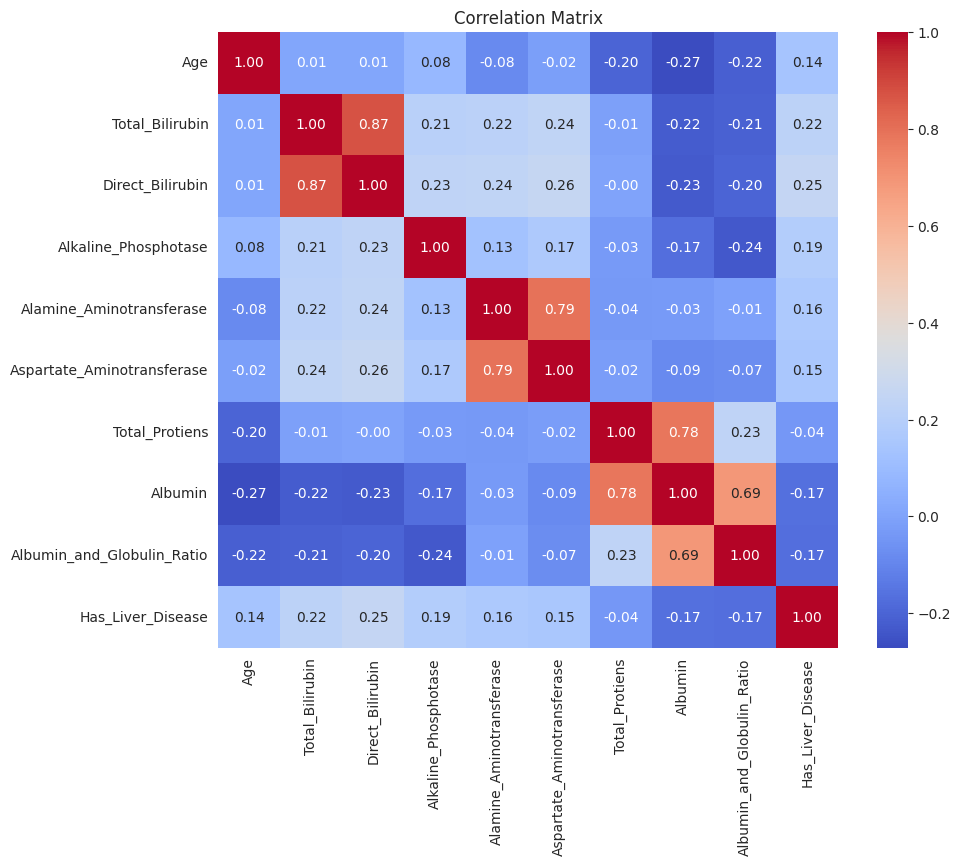

In [22]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns.drop('Has_Liver_Disease')):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x='Has_Liver_Disease', y=col, data=df)
    plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.tight_layout()
plt.suptitle('Numerical Features vs. Liver Disease', y=1.02)
plt.savefig('numerical_boxplots.png')


plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('Gender', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')


plt.show()

# Encoding, Scaling

In [23]:

df = pd.get_dummies(df, columns=['Gender'], drop_first=True, dtype=int)

print(df.head())


X = df.drop('Has_Liver_Disease', axis=1)
y = df['Has_Liver_Disease']


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\n--- After Scaling ---")


print(X_scaled.head())


final_X = X_scaled
final_y = y

   Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   
2   62              7.3               4.1                   490   
3   58              1.0               0.4                   182   
4   72              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Has_Liver_Disease  Gender_Male  
0      3.3                        0.90                  1            0  


# Feature Engineering

In [24]:
df['AST_ALT_Ratio'] = df['Aspartate_Aminotransferase'] / df['Alamine_Aminotransferase']
df['AST_ALT_Ratio'].head()

,AST_ALT_Ratio
0,1.125000
1,1.562500
2,1.133333
3,1.428571
4,2.185185


In [25]:
df['Direct_Total_Bilirubin_Ratio'] = df['Direct_Bilirubin'] / df['Total_Bilirubin']
df['Direct_Total_Bilirubin_Ratio'].head()

,Direct_Total_Bilirubin_Ratio
0,0.142857
1,0.504587
2,0.561644
3,0.400000
4,0.512821


In [26]:
age_bins = [0, 18, 30, 60, 100]
age_labels = ['Adolescent', 'Young Adult', 'Middle-Aged', 'Senior']


df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)




In [27]:
print("\n--- Data with New Engineered Features ---")
print("Notice the three new columns at the end: 'AST_ALT_Ratio', 'Direct_Total_Bilirubin_Ratio', and 'AgeGroup'")
print(df.head())


--- Data with New Engineered Features ---
Notice the three new columns at the end: 'AST_ALT_Ratio', 'Direct_Total_Bilirubin_Ratio', and 'AgeGroup'
   Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   
2   62              7.3               4.1                   490   
3   58              1.0               0.4                   182   
4   72              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

In [28]:
import numpy as np
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())
df.drop_duplicates(inplace=True)


df['AST_ALT_Ratio'] = df['Aspartate_Aminotransferase'] / df['Alamine_Aminotransferase']

df['Direct_Total_Bilirubin_Ratio'] = df['Direct_Bilirubin'] / df['Total_Bilirubin']

df['AST_ALT_Ratio'] = df['AST_ALT_Ratio'].fillna(0)
df['Direct_Total_Bilirubin_Ratio'] = df['Direct_Total_Bilirubin_Ratio'].fillna(0)

df.replace([np.inf, -np.inf], 0, inplace=True)


age_bins = [0, 18, 30, 60, 100]
age_labels = ['Adolescent', 'Young Adult', 'Middle-Aged', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

print("--- Data with New Engineered Features (Error Fixed) ---")
print("The new ratio columns have been filled, and the AgeGroup column is preserved.")
print(df.head())

--- Data with New Engineered Features (Error Fixed) ---
The new ratio columns have been filled, and the AgeGroup column is preserved.
   Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   
2   62              7.3               4.1                   490   
3   58              1.0               0.4                   182   
4   72              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  

# evaluate the model using metrics such as accuracy,recall,precision,roc curve,auc score,confusion metrics.

In [29]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

X = final_X
y = final_y
X.fillna(0, inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



model = LogisticRegression(random_state=42, class_weight='balanced',max_iter=10000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("--- Model Report Card ---")
print(f"Accuracy {accuracy:.2f}")
print(f"Precision {precision:.2f}")
print(f"Recall  {recall:.2f}")
print(f"AUC Score  {roc_auc:.2f}")



--- Model Report Card ---
Accuracy 0.73
Precision 0.92
Recall  0.68
AUC Score  0.80


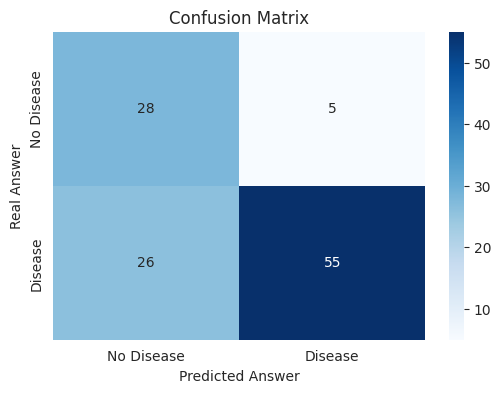

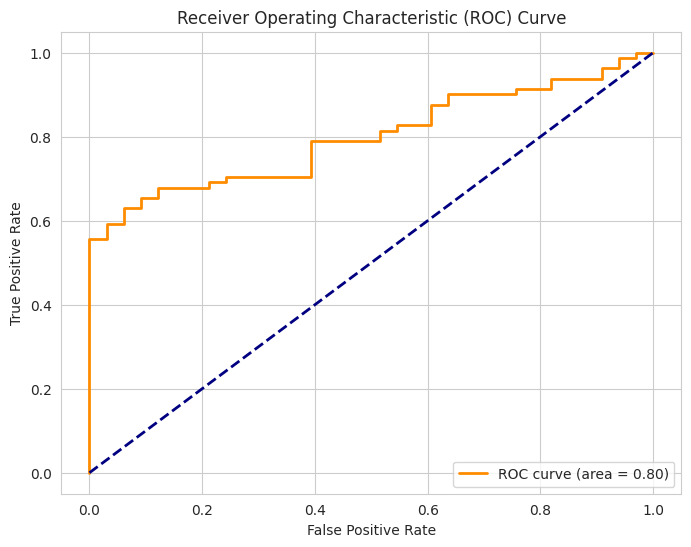

In [30]:

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Answer')
plt.ylabel('Real Answer')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')

plt.show()